Importing libraries

In [229]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set(rc={'figure.figsize':(8, 8)}, font_scale=1.2)
from sklearn.cluster import KMeans


Reading data

In [230]:
df= pd.read_excel(r"C:\Users\ahmedintly\Desktop\New Microsoft Excel Worksheet (3).xlsx",sheet_name="Sheet1")


In [231]:
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09 00:00:00,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03 00:00:00,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02 00:00:00,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Cleaning data

In [233]:
df.drop(['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Z_CostContact','Z_Revenue','Response'],axis=1,inplace=True)

In [234]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
dtype: int64

In [235]:
df.dropna(inplace=True)

In [236]:
df_edit=df.drop("ID",inplace=True,axis=1)

In [237]:
df.duplicated().value_counts()

False    2015
True      201
dtype: int64

In [238]:
df.drop_duplicates(subset=None,keep='first',inplace=True)

c:\Users\ahmedintly\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

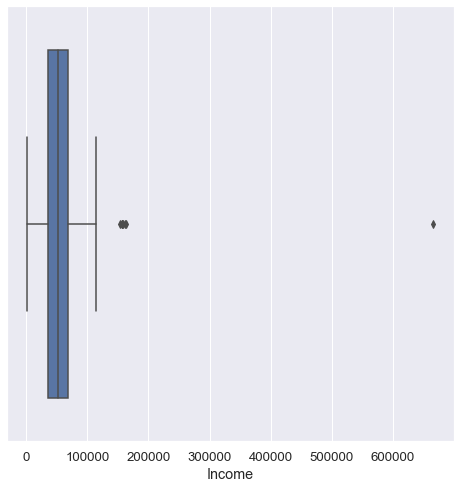

In [239]:
sns.boxplot(df['Income'])

In [241]:
df[df['Income']>130000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
164,1973,PhD,Married,157243.0,0,1,2014-01-03 00:00:00,98,20,2,1582,1,2,1,15,0,22,0,0
617,1976,PhD,Together,162397.0,1,1,2013-03-06 00:00:00,31,85,1,16,2,1,2,0,0,0,1,1
655,1975,Graduation,Divorced,153924.0,0,0,2014-07-02 00:00:00,81,1,1,1,1,1,1,0,0,0,0,0
687,1982,PhD,Married,160803.0,0,0,2012-04-08 00:00:00,21,55,16,1622,17,3,4,15,0,28,1,0
1300,1971,Master,Together,157733.0,1,0,2013-04-06 00:00:00,37,39,1,9,2,0,8,0,1,0,1,1
1653,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,1725,2,1,1,0,0,28,0,1
2132,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,2,1,1,1,0,0,0,0,0
2233,1977,Graduation,Together,666666.0,1,0,2013-02-06 00:00:00,23,9,14,18,8,1,12,4,3,1,3,6


In [242]:
df.drop([164,617,655,687,1300,1653,2132,2233],axis=0,inplace=True)

c:\Users\ahmedintly\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

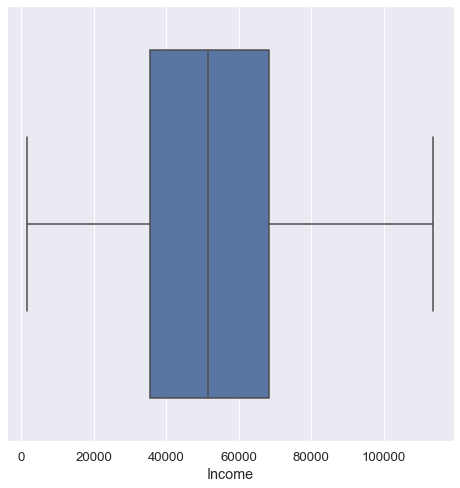

In [243]:
sns.boxplot(df['Income'])


In [244]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1957,Graduation,Single,58138.0,0,0,2012-04-09 00:00:00,58,635,88,546,172,88,88,3,8,10,4,7
1,1954,Graduation,Single,46344.0,1,1,2014-08-03 00:00:00,38,11,1,6,2,1,6,2,1,1,2,5
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4
3,1984,Graduation,Together,26646.0,1,0,2014-10-02 00:00:00,26,11,4,20,10,3,5,2,2,0,4,6
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,6,3,4,3,1,0,0,3,4
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3


data processing

In [245]:
df['total_spent']=df.iloc[:,9:15].sum(axis=1)

In [255]:
df.drop([126,456,1259],axis=0,inplace=True)
sns.boxplot(df['total_spent'])



KeyError: '[126, 456, 1259] not found in axis'

In [ ]:
df['Year_Birth']= 2022-df['Year_Birth']

In [ ]:
df=df.rename(columns={"Year_Birth":'age'})

In [ ]:
df.head()

,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,total_spent
0,65,Graduation,Single,58138.0,0,0,2012-04-09 00:00:00,58,635,88,546,172,88,88,3,8,10,4,7,985
1,68,Graduation,Single,46344.0,1,1,2014-08-03 00:00:00,38,11,1,6,2,1,6,2,1,1,2,5,18
2,57,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,351
3,38,Graduation,Together,26646.0,1,0,2014-10-02 00:00:00,26,11,4,20,10,3,5,2,2,0,4,6,44
4,41,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,254


In [ ]:
df['total_son']=df['Kidhome']+df['Teenhome']

In [ ]:
df

,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,total_spent,total_son
0,65,Graduation,Single,58138.0,0,0,2012-04-09 00:00:00,58,635,88,...,172,88,88,3,8,10,4,7,985,0
1,68,Graduation,Single,46344.0,1,1,2014-08-03 00:00:00,38,11,1,...,2,1,6,2,1,1,2,5,18,2
2,57,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,111,21,42,1,8,2,10,4,351,0
3,38,Graduation,Together,26646.0,1,0,2014-10-02 00:00:00,26,11,4,...,10,3,5,2,2,0,4,6,44,1
4,41,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,46,27,15,5,5,3,6,5,254,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,36,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,...,3,4,3,1,0,0,3,4,18,0
2235,55,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,42,118,247,2,9,3,4,5,634,1
2237,41,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,32,12,24,1,2,3,13,6,334,0
2238,66,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,80,30,61,2,6,5,10,3,417,1


Data analysis

In [ ]:
df.describe()

,age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,total_spent,total_son
count,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000
mean,53.225534,52081.644312,0.441629,0.507203,49.006458,304.893691,26.429707,167.116244,37.612022,27.206160,43.731744,2.320417,4.101838,2.656731,5.788376,5.314953,304.416294,0.948833
std,11.987145,21590.393456,0.536163,0.546608,28.967255,336.655952,39.861860,223.806904,54.858330,41.492241,51.646321,1.904574,2.758695,2.887021,3.234986,2.436502,337.366125,0.746007
min,26.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,45.000000,35544.000000,0.000000,0.000000,24.000000,23.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,45.000000,0.000000
50%,52.000000,51537.000000,0.000000,0.000000,49.000000,176.000000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,149.000000,1.000000
75%,63.000000,68627.000000,1.000000,1.000000,74.000000,505.000000,33.000000,230.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,489.000000,1.000000
max,129.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1729.000000,3.000000


In [ ]:
df[df['NumWebPurchases']==27]

,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,total_spent,total_son
1898,77,PhD,Single,113734.0,0,0,28-05-2014,9,6,2,...,1,262,3,0,27,0,0,1,271,0


In [ ]:
df[df['total_spent']==1393.000000]

,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,total_spent,total_son
1031,51,Graduation,Single,91700.0,0,0,17-01-2013,58,576,172,...,125,115,19,1,8,6,5,3,1393,0


In [256]:
df['age'].value_counts()

46     79
51     77
47     75
52     71
50     71
44     70
57     66
49     63
53     63
48     61
66     52
64     50
70     49
45     47
63     46
54     46
43     46
68     44
62     44
56     43
67     42
55     41
60     40
71     39
42     39
36     38
65     38
59     38
41     37
58     37
40     37
38     36
39     35
69     33
61     31
37     29
73     26
72     26
34     25
35     25
33     24
74     19
32     16
75     15
31     13
30     12
76     11
77      8
78      7
79      5
27      4
29      4
28      3
26      2
123     1
81      1
129     1
122     1
82      1
Name: age, dtype: int64

In [257]:
df[df['age']==129]

,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,total_spent,total_son
239,129,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,...,7,0,2,1,1,0,2,4,15,1


In [258]:
df[df['age']==26]

,age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,total_spent,total_son
46,26,2n Cycle,Married,7500.0,0,0,2012-09-11 00:00:00,24,3,18,...,15,22,50,3,3,1,3,9,122,0
1170,26,Basic,Married,14421.0,0,0,17-02-2014,81,0,0,...,3,3,8,1,1,0,2,5,17,0


Data visualization

<AxesSubplot:xlabel='MntWines', ylabel='Marital_Status'>

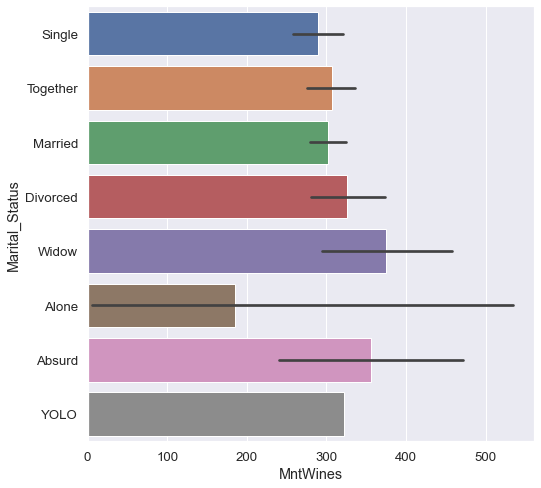

In [259]:
sns.barplot(x=df['MntWines'],y=df['Marital_Status'])

<AxesSubplot:xlabel='MntWines', ylabel='Education'>

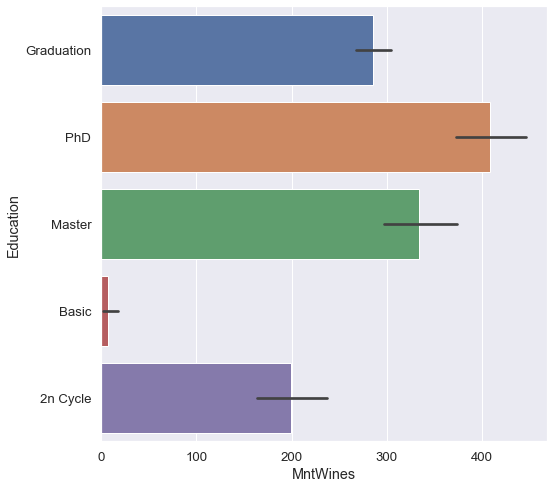

In [260]:
sns.barplot(x=df['MntWines'],y=df['Education'])

<AxesSubplot:xlabel='MntMeatProducts', ylabel='Marital_Status'>

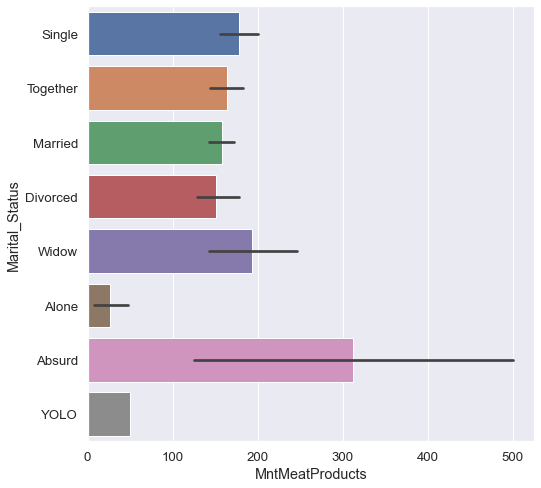

In [261]:
sns.barplot(x=df['MntMeatProducts'],y=df['Marital_Status'])

<AxesSubplot:xlabel='NumWebPurchases', ylabel='Income'>

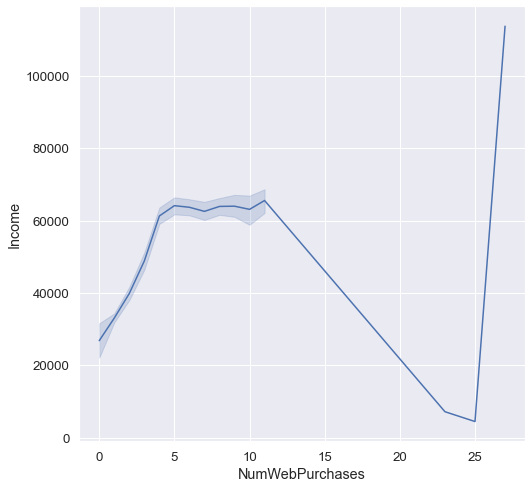

In [262]:
sns.lineplot(x=df['NumWebPurchases'],y=df['Income'])

<AxesSubplot:xlabel='NumStorePurchases', ylabel='Income'>

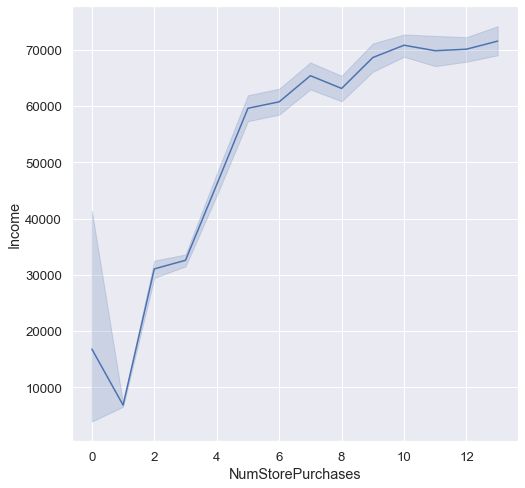

In [263]:
sns.lineplot(x=df['NumStorePurchases'],y=df['Income'])

<AxesSubplot:xlabel='NumWebPurchases', ylabel='NumWebVisitsMonth'>

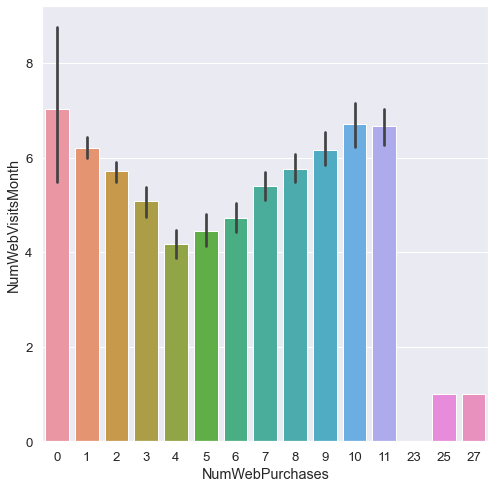

In [264]:
sns.barplot(x=df['NumWebPurchases'],y=df['NumWebVisitsMonth'])


Cluster

In [265]:
x=df.iloc[:,[3,-2]].values
# -2 for total_spent     3 for income

In [266]:
wcss=[]
for i in range(1,11):
    kmean= KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(x)
    wcss.append(kmean.inertia_)


c:\Users\ahmedintly\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WCSS')

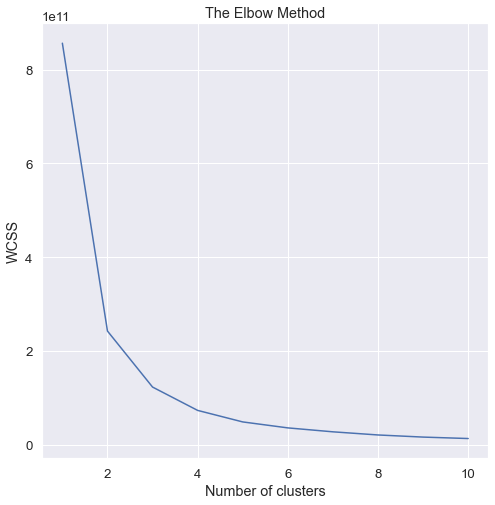

In [267]:
sns.lineplot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")


In [268]:
kmean= KMeans(n_clusters=3,init='k-means++',random_state=41)
y_kmeans=kmean.fit_predict(x)

c:\Users\ahmedintly\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ahmedintly\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ahmedintly\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

[Text(0.5, 0, 'Income'),
 Text(0, 0.5, 'Total_spent'),
 Text(0.5, 1.0, 'customar segmntaion Clustring')]

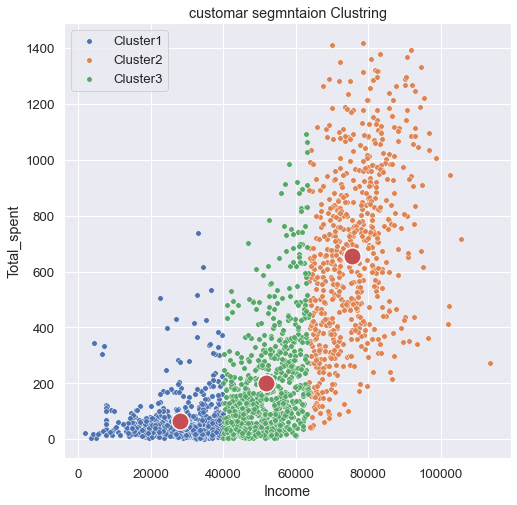

In [269]:


z=sns.scatterplot(x[y_kmeans ==0,0],x[y_kmeans ==0,1],s=30,label='Cluster1')
sns.scatterplot(x[y_kmeans ==1,0],x[y_kmeans ==1,1],s=30,label='Cluster2')
sns.scatterplot(x[y_kmeans ==2,0],x[y_kmeans ==2,1],s=30,label='Cluster3')
sns.scatterplot(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=300)
z.set(xlabel ="Income", ylabel = "Total_spent", title ='customar segmntaion Clustring')

